## Análise Doenças Cardio Vasculares

As doenças cardiovasculares (DCVs) são a causa número 1 de morte no mundo , levando cerca de 17,9 milhões de vidas a cada ano , o que representa 31% de todas as mortes em todo o mundo .
A insuficiência cardíaca é um evento comum causado por DCV e esse conjunto de dados contém 12 recursos que podem ser usados ​​para prever a mortalidade por insuficiência cardíaca.

A maioria das doenças cardiovasculares pode ser prevenida abordando fatores de risco comportamentais, como uso de tabaco, dieta não saudável e obesidade, inatividade física e uso nocivo de álcool usando estratégias para toda a população.

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

### Importando Biblioteca

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

### Importação do Dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Apresentação do Dataset

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


In [4]:
# Colunas do Dataset
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

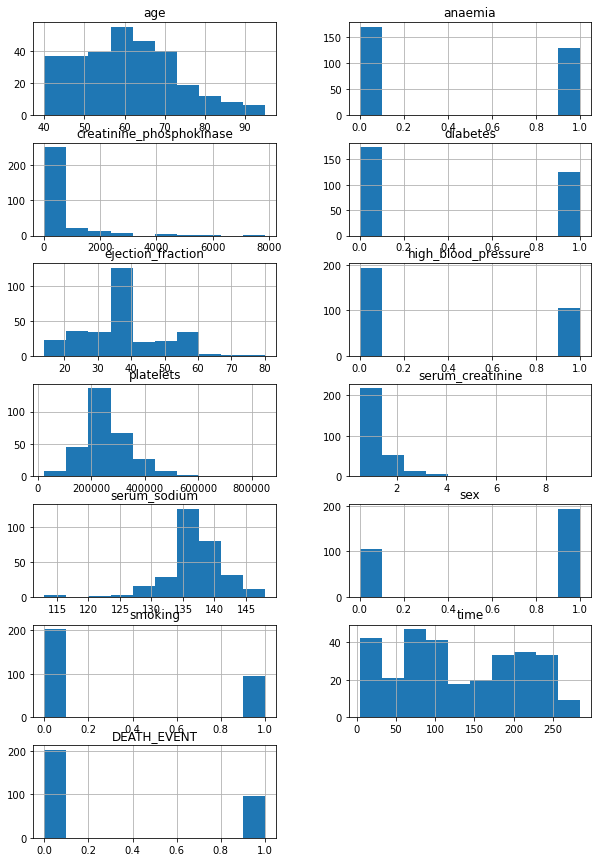

In [187]:
#Histograma do Dataset
df.hist(layout = (7, 2), xlabelsize = 10, ylabelsize = 10, figsize = (10,15))
plt.show()

<AxesSubplot:>

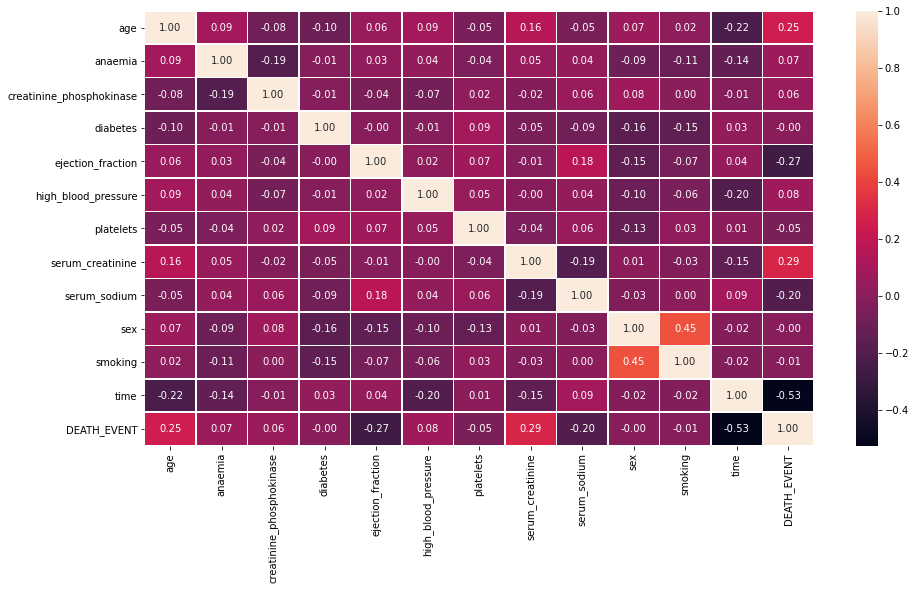

In [195]:
# Correlação dos Dados
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", linewidths=.6)

In [58]:
df.mean()

age                            60.83
anaemia                         0.43
creatinine_phosphokinase      581.84
diabetes                        0.42
ejection_fraction              38.08
high_blood_pressure             0.35
platelets                  263358.03
serum_creatinine                1.39
serum_sodium                  136.63
sex                             0.65
smoking                         0.32
time                          130.26
DEATH_EVENT                     0.32
dtype: float64

In [62]:
df.sum()

age                           18189.33
anaemia                         129.00
creatinine_phosphokinase     173970.00
diabetes                        125.00
ejection_fraction             11387.00
high_blood_pressure             105.00
platelets                  78744050.75
serum_creatinine                416.77
serum_sodium                  40851.00
sex                             194.00
smoking                          96.00
time                          38948.00
DEATH_EVENT                      96.00
dtype: float64

In [64]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [65]:
df.median()

age                            60.00
anaemia                         0.00
creatinine_phosphokinase      250.00
diabetes                        0.00
ejection_fraction              38.00
high_blood_pressure             0.00
platelets                  262000.00
serum_creatinine                1.10
serum_sodium                  137.00
sex                             1.00
smoking                         0.00
time                          115.00
DEATH_EVENT                     0.00
dtype: float64

Risco de Morte por Doença Cardiovascular quando paciente não tem anemia

In [113]:
df[df['anaemia']==0].DEATH_EVENT.mean()

0.29411764705882354

Risco de Morte por Doença Cardiovascular quando paciente tem anemia

In [191]:
df[df['anaemia']==1].DEATH_EVENT.mean()

35.65891472868217

Gráfico Risco por anemia

<AxesSubplot:xlabel='anaemia'>

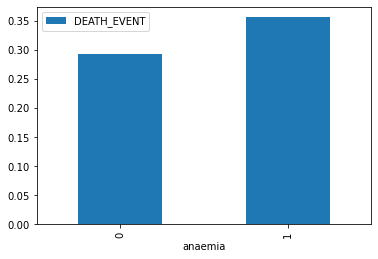

In [190]:
df.groupby(['anaemia'])[['DEATH_EVENT']].mean().plot(kind = 'bar')

Risco de Morte por Doença Cardiovascular quando paciente não fuma

In [111]:
df[df['smoking']==0].DEATH_EVENT.mean()

0.3251231527093596

Risco de Morte por Doença Cardiovascular quando paciente fuma

In [112]:
df[df['smoking']==1].DEATH_EVENT.mean()

0.3125

Gráfico Risco por Fumo

<AxesSubplot:xlabel='smoking'>

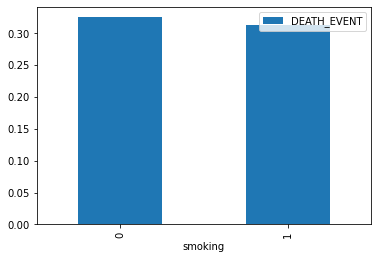

In [165]:
df.groupby(['smoking'])[['DEATH_EVENT']].mean().plot(kind = 'bar')

Risco de Morte por Doença Cardiovascular quando paciente não tem diabetes

In [115]:
df[df['diabetes']==0].DEATH_EVENT.mean()

0.3218390804597701

Risco de Morte por Doença Cardiovascular quando paciente tem diabetes

In [116]:
df[df['diabetes']==1].DEATH_EVENT.mean()

0.32

Gráfico Risco por Diabetes

<AxesSubplot:xlabel='diabetes'>

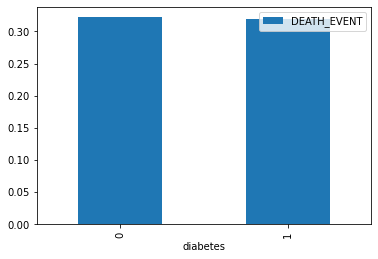

In [167]:
df.groupby(['diabetes'])[['DEATH_EVENT']].mean().plot(kind = 'bar')

Risco de Morte por Doença Cardiovascular quando paciente é do sexo feminino

In [118]:
df[df['sex']==0].DEATH_EVENT.mean()

0.3238095238095238

Risco de Morte por Doença Cardiovascular quando paciente é do sexo masculino

In [117]:
df[df['sex']==1].DEATH_EVENT.mean()

0.31958762886597936

Gráfico Risco por Sexo

<AxesSubplot:xlabel='sex'>

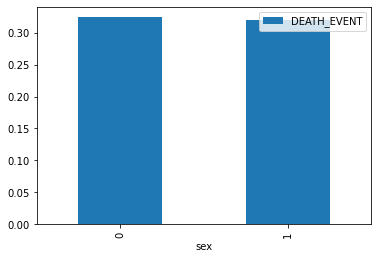

In [144]:
df.groupby(['sex'])[['DEATH_EVENT']].mean().plot(kind = 'bar')

Risco de Morte por Doença Cardiovascular quando paciente não tem pressão alta

In [119]:
df[df['high_blood_pressure']==0].DEATH_EVENT.mean()

0.29381443298969073

Risco de Morte por Doença Cardiovascular quando paciente tem pressão alta

In [170]:
df[df['high_blood_pressure']==1].DEATH_EVENT.mean()

0.37142857142857144

Gráfico Risco por Pressão Alta

<AxesSubplot:xlabel='high_blood_pressure'>

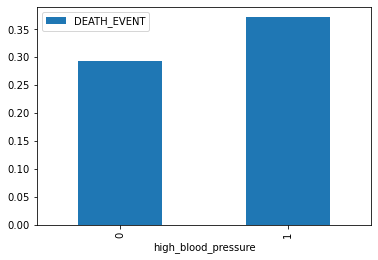

In [173]:
df.groupby(['high_blood_pressure'])[['DEATH_EVENT']].mean().plot(kind = 'bar')

Risco de Morte por Doença Cardiovascular quando paciente tem 60 anos ou menos

In [172]:
df[df['age'] <= 60].DEATH_EVENT.mean()

0.2716049382716049

Risco de Morte por Doença Cardiovascular quando paciente tem mais de 60 anos

In [171]:
df[df['age'] > 60].DEATH_EVENT.mean()

0.3795620437956204

Gráfico Risco por Idade

<AxesSubplot:xlabel='age'>

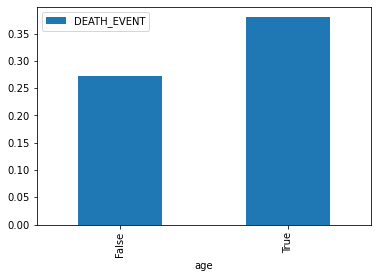

In [179]:
df.groupby(df['age'] > 60)[['DEATH_EVENT']].mean().plot(kind = 'bar')

Risco de Morte por Doença Cardiovascular quando paciente tem acompanhamento Médico por 115 dias ou menos

In [180]:
df[df['time'] <= 115].DEATH_EVENT.mean()

0.5033112582781457

Risco de Morte por Doença Cardiovascular quando paciente tem acompanhamento Médico por mais de 115 dias

In [181]:
df[df['time'] > 115].DEATH_EVENT.mean()

0.13513513513513514

Risco por Acompanhamento Médico

<AxesSubplot:xlabel='time'>

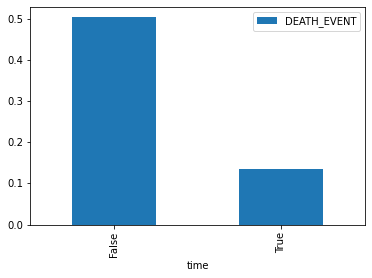

In [182]:
df.groupby(df['time'] > 115)[['DEATH_EVENT']].mean().plot(kind = 'bar')